In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("E:/125015049/heartfailure.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

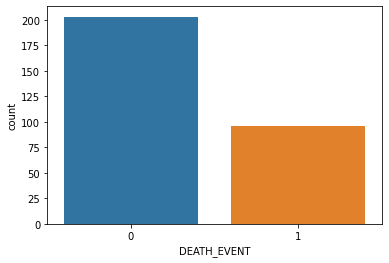

In [6]:
sns.countplot(df['DEATH_EVENT'])

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
x=df.iloc[:,0:12].values

In [9]:
y=df['DEATH_EVENT'].values

In [10]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [26]:
best_kvalue=0
best_score=0
for i in range(2,20,2):
    knn=KNeighborsClassifier(n_neighbors=i,metric="jaccard")
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) >=best_score:
        best_score=knn.score(x_train,y_train)
        best_kvalue=i

print("Best KNN value: {}".format(best_kvalue))
print("Test accuracy: {}%".format(round(best_score*100,2)))

Best KNN value: 2
Test accuracy: 69.2%


In [18]:
y_pred_knn= knn.predict(x_test)
print("KNN Classification report: \n\n",classification_report(y_test,y_pred_knn))

KNN Classification report: 

               precision    recall  f1-score   support

           0       0.64      1.00      0.78        48
           1       0.00      0.00      0.00        27

    accuracy                           0.64        75
   macro avg       0.32      0.50      0.39        75
weighted avg       0.41      0.64      0.50        75



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='age', ylabel='ejection_fraction'>

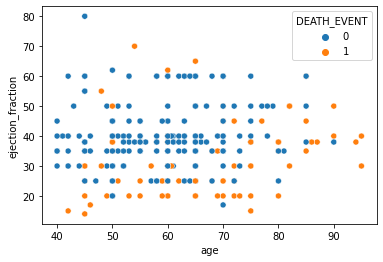

In [29]:
sns.scatterplot(x=df['age'],y=df['ejection_fraction'],hue=df['DEATH_EVENT'])